# 0. checking data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,re,time
from collections import Counter

In [2]:
data = pd.read_csv('output_0.csv').iloc[:,1:]

In [3]:
raw = pd.read_csv('applications.csv').iloc[:,1:]

In [4]:
data.shape

(94866, 100)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ssn_1,94866.0,1.073472,0.555067,1.0,1.0,1.0,1.0,10.0
ssn_3,94866.0,1.201822,1.537184,1.0,1.0,1.0,1.0,22.0
ssn_7,94866.0,1.456644,3.504662,1.0,1.0,1.0,1.0,41.0
ssn_15,94866.0,1.952712,7.414441,1.0,1.0,1.0,1.0,75.0
ssn_30,94866.0,2.861383,14.689999,1.0,1.0,1.0,1.0,145.0
zip5_1,94866.0,1.043851,0.211152,1.0,1.0,1.0,1.0,4.0
zip5_3,94866.0,1.110113,0.340641,1.0,1.0,1.0,1.0,5.0
zip5_7,94866.0,1.238536,0.518311,1.0,1.0,1.0,1.0,7.0
zip5_15,94866.0,1.491535,0.792667,1.0,1.0,1.0,2.0,8.0
zip5_30,94866.0,1.953039,1.215970,1.0,1.0,2.0,2.0,11.0


In [6]:
full = pd.concat([raw,data],axis=1)

In [7]:
full.columns[:10]

Index(['date', 'ssn', 'firstname', 'lastname', 'address', 'zip5', 'dob',
       'homephone', 'fraud', 'ssn_1'],
      dtype='object')

In [8]:
full.columns[10:]

Index(['ssn_3', 'ssn_7', 'ssn_15', 'ssn_30', 'zip5_1', 'zip5_3', 'zip5_7',
       'zip5_15', 'zip5_30', 'dob_1', 'dob_3', 'dob_7', 'dob_15', 'dob_30',
       'address_1', 'address_3', 'address_7', 'address_15', 'address_30',
       'homephone_1', 'homephone_3', 'homephone_7', 'homephone_15',
       'homephone_30', 'firstname_lastname_1', 'firstname_lastname_3',
       'firstname_lastname_7', 'firstname_lastname_15',
       'firstname_lastname_30', 'homephone_address_1', 'homephone_address_3',
       'homephone_address_7', 'homephone_address_15', 'homephone_address_30',
       'homephone_zip5_1', 'homephone_zip5_3', 'homephone_zip5_7',
       'homephone_zip5_15', 'homephone_zip5_30', 'address_zip5_1',
       'address_zip5_3', 'address_zip5_7', 'address_zip5_15',
       'address_zip5_30', 'ssn_address_1', 'ssn_address_3', 'ssn_address_7',
       'ssn_address_15', 'ssn_address_30', 'ssn_dob_1', 'ssn_dob_3',
       'ssn_dob_7', 'ssn_dob_15', 'ssn_dob_30', 'ssn_zip5_1', 'ssn_zip5_3',
      

In [9]:
full.loc[:,['dob','dob_1','dob_3','dob_7','dob_15','dob_30']]

,dob,dob_1,dob_3,dob_7,dob_15,dob_30
0,11/3/30,1,1,1,1,1
1,4/10/21,1,1,1,1,1
2,9/11/13,1,1,1,1,1
3,6/26/07,21,21,21,21,21
4,6/26/07,21,21,21,21,21
5,5/16/23,1,1,1,1,1
6,11/19/72,1,1,1,1,1
7,10/17/95,1,1,1,1,1
8,3/14/15,1,1,1,1,1
9,6/28/86,1,1,1,1,1


In [10]:
full.dtypes

date                               object
ssn                                 int64
firstname                          object
lastname                           object
address                            object
zip5                                int64
dob                                object
homephone                           int64
fraud                               int64
ssn_1                               int64
ssn_3                               int64
ssn_7                               int64
ssn_15                              int64
ssn_30                              int64
zip5_1                              int64
zip5_3                              int64
zip5_7                              int64
zip5_15                             int64
zip5_30                             int64
dob_1                               int64
dob_3                               int64
dob_7                               int64
dob_15                              int64
dob_30                            

# 1. transforming data

## Taking care of frivolous values

for example, there's an outlier in `ssn`

In [11]:
Counter(full['ssn']).most_common()[:10]

[(737610282, 1478),
 (938972725, 85),
 (829352390, 57),
 (810776805, 51),
 (473311863, 25),
 (163830210, 18),
 (596061461, 13),
 (118692079, 13),
 (250610446, 12),
 (849295926, 12)]

Likewise in `dob` and `homephone`

In [13]:
Counter(full['dob']).most_common()[:10]

[('6/26/07', 9681),
 ('3/18/64', 4808),
 ('6/25/76', 3698),
 ('6/28/88', 330),
 ('2/16/74', 173),
 ('2/15/67', 59),
 ('3/15/02', 31),
 ('10/12/15', 26),
 ('1/27/09', 19),
 ('8/20/68', 19)]

In [14]:
Counter(full['homephone']).most_common()[:10]

[(9105580920, 4974),
 (6384782007, 364),
 (6035129044, 215),
 (2113738531, 184),
 (3417174496, 65),
 (4024680535, 61),
 (2669445638, 48),
 (6637507363, 44),
 (5753452592, 30),
 (6538326086, 27)]

The exploration of the property of frivolous values will be at the beginning of `KS scores` part

In [15]:
full.columns[[9,10,11,12,13,19,20,21,22,23,29,30,31,32,33]]

Index(['ssn_1', 'ssn_3', 'ssn_7', 'ssn_15', 'ssn_30', 'dob_1', 'dob_3',
       'dob_7', 'dob_15', 'dob_30', 'homephone_1', 'homephone_3',
       'homephone_7', 'homephone_15', 'homephone_30'],
      dtype='object')

In [16]:
ssn_f = [737610282]
dob_f = ['6/26/07','3/18/64','6/25/76','6/28/88','2/16/74']
homephone_f = [9105580920,6384782007,6035129044,2113738531]

In [17]:
full.iloc[np.where(full['ssn'] == ssn_f[0])[0],9:14] = 1 
full.iloc[np.where((full['dob'] == '6/26/07')|
             (full['dob'] == '3/18/64')|
             (full['dob'] == '6/25/76')|
             (full['dob'] == '6/28/88')|
             (full['dob'] == '2/16/74'))[0],19:24] = 1 
full.iloc[np.where((full['homephone'] == 9105580920)|
             (full['homephone'] == 6384782007)|
             (full['homephone'] == 6035129044)|
             (full['homephone'] == 2113738531))[0],29:34] = 1 

### Now by checking the original dataset, we can see the difference before and after frivolous value counts are reset

In [18]:
data.iloc[:,:25].describe().T

,count,mean,std,min,25%,50%,75%,max
ssn_1,94866.0,1.073472,0.555067,1.0,1.0,1.0,1.0,10.0
ssn_3,94866.0,1.201822,1.537184,1.0,1.0,1.0,1.0,22.0
ssn_7,94866.0,1.456644,3.504662,1.0,1.0,1.0,1.0,41.0
ssn_15,94866.0,1.952712,7.414441,1.0,1.0,1.0,1.0,75.0
ssn_30,94866.0,2.861383,14.689999,1.0,1.0,1.0,1.0,145.0
zip5_1,94866.0,1.043851,0.211152,1.0,1.0,1.0,1.0,4.0
zip5_3,94866.0,1.110113,0.340641,1.0,1.0,1.0,1.0,5.0
zip5_7,94866.0,1.238536,0.518311,1.0,1.0,1.0,1.0,7.0
zip5_15,94866.0,1.491535,0.792667,1.0,1.0,1.0,2.0,8.0
zip5_30,94866.0,1.953039,1.215970,1.0,1.0,2.0,2.0,11.0


In [19]:
full.iloc[:,9:34].describe().T

,count,mean,std,min,25%,50%,75%,max
ssn_1,94866.0,1.011637,0.109293,1.0,1.0,1.0,1.0,3.0
ssn_3,94866.0,1.015474,0.133127,1.0,1.0,1.0,1.0,5.0
ssn_7,94866.0,1.022906,0.179578,1.0,1.0,1.0,1.0,7.0
ssn_15,94866.0,1.030211,0.245583,1.0,1.0,1.0,1.0,10.0
ssn_30,94866.0,1.042144,0.350971,1.0,1.0,1.0,1.0,16.0
zip5_1,94866.0,1.043851,0.211152,1.0,1.0,1.0,1.0,4.0
zip5_3,94866.0,1.110113,0.340641,1.0,1.0,1.0,1.0,5.0
zip5_7,94866.0,1.238536,0.518311,1.0,1.0,1.0,1.0,7.0
zip5_15,94866.0,1.491535,0.792667,1.0,1.0,1.0,2.0,8.0
zip5_30,94866.0,1.953039,1.215970,1.0,1.0,2.0,2.0,11.0


In [20]:
full.iloc[:,9:].max()

ssn_1                               3
ssn_3                               5
ssn_7                               7
ssn_15                             10
ssn_30                             16
zip5_1                              4
zip5_3                              5
zip5_7                              7
zip5_15                             8
zip5_30                            11
dob_1                               4
dob_3                               4
dob_7                               5
dob_15                              7
dob_30                             10
address_1                           3
address_3                           4
address_7                           5
address_15                          7
address_30                         10
homephone_1                         5
homephone_3                         7
homephone_7                         8
homephone_15                       11
homephone_30                       16
firstname_lastname_1                4
firstname_la

# 2. KS scores

we can do a exploratory visualization to see the quality of our variables. The first variable `ssn_1` seems to have some predictability of fraud (as the count goes up, fraud ratio goes up)

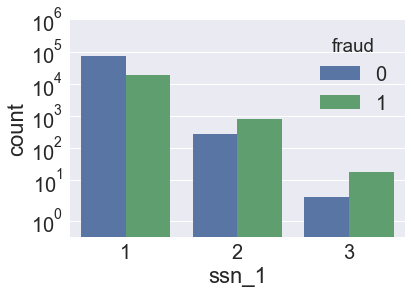

In [21]:
sns.set(font_scale=2)
ax = sns.countplot(x='ssn_1', hue = 'fraud',data = full)
ax.set(yscale='symlog')
ax.set_ylim([.1,1000000])
plt.show()

The last variable `firstname_lastname_ssn_dob_30` however, seem to be a even better variable

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


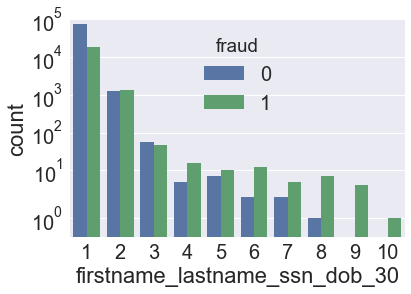

In [22]:
sns.set(font_scale=2)
ax = sns.countplot(x='firstname_lastname_ssn_dob_30', hue = 'fraud',data = full)
ax.set(yscale='symlog')
ax.set_ylim([.1,100000])
plt.show()

Likewise, we can take a look at the original dataset to see the quality of variables if we don't reset frivolous values. Looks like it does not separate goods and bads at all.

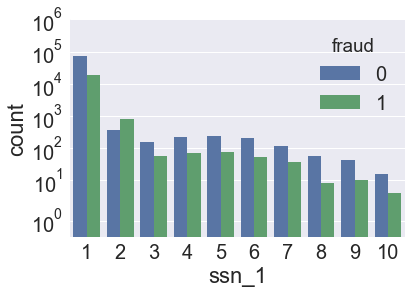

In [23]:
sns.set(font_scale=2)
ax = sns.countplot(x='ssn_1', hue = 'fraud',data = pd.concat([data,raw['fraud']],axis=1))
ax.set(yscale='symlog')
ax.set_ylim([.1,1000000])
plt.show()

now we try to quantify how good these variables are separating `good` and `bad` records. Note that despite this section is called KS scores, KS test is actually operated on continuous distributions. We are just borrowing this idea of max difference in cumulative distribution.

In [24]:
goods = full[full['fraud'] == 0]
goods.shape

(74702, 109)

In [25]:
bads = full[full['fraud'] == 1]
bads.shape

(20164, 109)

In [26]:
numgoods = len(goods)
numbads = len(bads)

Here I 抄

In [27]:
variable = 'ssn_1'
variable_max = full[variable].max()
x = pd.DataFrame(goods[variable].value_counts().sort_index())
x['index'] = x.index
y = pd.DataFrame(bads[variable].value_counts().sort_index())
y['index'] = y.index
dist1 = np.zeros(variable_max + 1)
dist2 = np.zeros(variable_max + 1)
dif = np.zeros(variable_max + 1)
for i in range(variable_max + 1):
    if i in x['index']:
        dist1[i] = x.loc[i,variable]
    if i in y['index']:
        dist2[i] = y.loc[i, variable]
dist1 = dist1 / numgoods
dist2 = dist2 / numbads
dif[0] = dist1[0] - dist2[0]
for i in range(1,variable_max + 1):
    dist1[i] = dist1[i-1] + dist1[i]
    dist2[i] = dist2[i-1] + dist2[i]
    dif[i] = dist1[i] - dist2[i]

print(dif.max() * 100)

3.5886281871534753


In [28]:
full.columns[9:]

Index(['ssn_1', 'ssn_3', 'ssn_7', 'ssn_15', 'ssn_30', 'zip5_1', 'zip5_3',
       'zip5_7', 'zip5_15', 'zip5_30', 'dob_1', 'dob_3', 'dob_7', 'dob_15',
       'dob_30', 'address_1', 'address_3', 'address_7', 'address_15',
       'address_30', 'homephone_1', 'homephone_3', 'homephone_7',
       'homephone_15', 'homephone_30', 'firstname_lastname_1',
       'firstname_lastname_3', 'firstname_lastname_7', 'firstname_lastname_15',
       'firstname_lastname_30', 'homephone_address_1', 'homephone_address_3',
       'homephone_address_7', 'homephone_address_15', 'homephone_address_30',
       'homephone_zip5_1', 'homephone_zip5_3', 'homephone_zip5_7',
       'homephone_zip5_15', 'homephone_zip5_30', 'address_zip5_1',
       'address_zip5_3', 'address_zip5_7', 'address_zip5_15',
       'address_zip5_30', 'ssn_address_1', 'ssn_address_3', 'ssn_address_7',
       'ssn_address_15', 'ssn_address_30', 'ssn_dob_1', 'ssn_dob_3',
       'ssn_dob_7', 'ssn_dob_15', 'ssn_dob_30', 'ssn_zip5_1', 'ssn_zip5_3

In [29]:
variables = np.array([])
scores = np.array([])
for v in full.columns[9:]:
    variable = v
    variable_max = full[variable].max()
    x = pd.DataFrame(goods[variable].value_counts().sort_index())
    x['index'] = x.index
    y = pd.DataFrame(bads[variable].value_counts().sort_index())
    y['index'] = y.index
    dist1 = np.zeros(variable_max + 1)
    dist2 = np.zeros(variable_max + 1)
    dif = np.zeros(variable_max + 1)
    for i in range(variable_max + 1):
        if i in x['index']:
            dist1[i] = x.loc[i,variable]
        if i in y['index']:
            dist2[i] = y.loc[i, variable]
    dist1 = dist1 / numgoods
    dist2 = dist2 / numbads
    dif[0] = dist1[0] - dist2[0]
    for i in range(1,variable_max + 1):
        dist1[i] = dist1[i-1] + dist1[i]
        dist2[i] = dist2[i-1] + dist2[i]
        dif[i] = dist1[i] - dist2[i]

    variables = np.hstack((variables,v))
    scores = np.hstack((scores,dif.max() * 100))

In [30]:
scores[np.argsort(-scores)]

array([13.47501397, 13.14636038, 13.1444954 , 12.86693697, 11.17357043,
        6.2431242 ,  6.00262063,  5.76791408,  5.76618015,  5.75090687,
        5.66181812,  5.61907087,  5.60577397,  5.59582888,  5.59582888,
        5.59396855,  5.59396855,  5.58773377,  5.58672719,  5.56688986,
        5.55436744,  5.48018882,  5.44700174,  5.43382554,  5.30545275,
        5.2818419 ,  5.17629405,  5.15527089,  5.13969196,  5.13455338,
        5.13455338,  5.13283552,  5.12654789,  5.12654789,  5.11662922,
        5.10303703,  5.09764564,  5.09183255,  5.01012763,  4.97349341,
        4.9653408 ,  4.87308985,  4.87159837,  4.85483361,  4.85182424,
        4.85182424,  4.83767358,  4.83767358,  4.83539156,  4.83536513,
        4.82121448,  4.8042969 ,  4.73411246,  4.6924982 ,  4.58524854,
        4.46820092,  4.43010735,  4.36854316,  4.3559598 ,  4.35005709,
        4.33588002,  4.33186406,  4.33186406,  4.32471232,  4.32431705,
        4.32376894,  4.32243029,  4.32243029,  4.31729065,  4.29

In [31]:
variables[np.argsort(-scores)]

array(['firstname_lastname_30', 'firstname_lastname_15',
       'firstname_lastname_7', 'firstname_lastname_3',
       'firstname_lastname_1', 'ssn_dob_30', 'firstname_lastname_dob_30',
       'ssn_30', 'firstname_lastname_homephone_30', 'ssn_dob_15',
       'firstname_lastname_ssn_30', 'firstname_lastname_zip5_30',
       'firstname_lastname_address_30', 'address_30', 'address_zip5_30',
       'address_zip5_homephone_30', 'homephone_address_30', 'ssn_zip5_30',
       'ssn_address_30', 'firstname_lastname_ssn_dob_30',
       'homephone_zip5_30', 'firstname_lastname_dob_15', 'ssn_dob_7',
       'ssn_homephone_30', 'ssn_15', 'firstname_lastname_homephone_15',
       'firstname_lastname_ssn_15', 'firstname_lastname_zip5_15',
       'firstname_lastname_address_15', 'address_15', 'address_zip5_15',
       'firstname_lastname_dob_7', 'address_zip5_homephone_15',
       'homephone_address_15', 'ssn_address_15', 'homephone_zip5_15',
       'ssn_zip5_15', 'firstname_lastname_ssn_dob_15', 'ssn_7

In [32]:
v_50 = variables[np.argsort(-scores)][:50]

In [33]:
len(v_50)

50

In [34]:
full_50 = full.loc[:,v_50]

In [35]:
full_50.shape

(94866, 50)

In [36]:
full_50 = pd.concat([full_50,full['fraud']],axis=1)

In [37]:
full_50.head(5)

,firstname_lastname_30,firstname_lastname_15,firstname_lastname_7,firstname_lastname_3,firstname_lastname_1,ssn_dob_30,firstname_lastname_dob_30,ssn_30,firstname_lastname_homephone_30,ssn_dob_15,...,firstname_lastname_zip5_7,firstname_lastname_ssn_7,firstname_lastname_address_7,address_zip5_7,address_7,address_zip5_homephone_7,homephone_address_7,ssn_address_7,homephone_zip5_7,fraud
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


# 3. feature selection (forward) 

Since we shouldn't touch `out_of_date` part before final testing, we use only `in_date` as feature selection data

In [38]:
in_date = np.where((raw['date'].str[:2]!='11')&(raw['date'].str[:2]!='12'))[0]
in_date

array([    0,     1,     2, ..., 77847, 77848, 77849])

In [39]:
in_date_50 = full_50.iloc[in_date,:]

In [40]:
in_date_50.shape

(77850, 51)

Here I use `logistic regression` as the baseline model

In [80]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn import metrics

In [234]:
x_train, x_test, y_train, y_test = train_test_split(in_date_50.iloc[:,:50], in_date_50.iloc[:,50], 
                                                    test_size = 0.2,
                                                    random_state = 0)

In [235]:
x_train.shape

(62280, 50)

In [236]:
x_test.shape

(15570, 50)

In [237]:
m = LogisticRegression()
#m = PassiveAggressiveClassifier()

In [238]:
m.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [239]:
predicted = m.predict(x_test)

The reason I choose `recall` scores as our optmizing measurement/ objective is `FDR (fraud detection rate?)` , which is the ratio of frauds caught by the algorithm, and the definition of `recall` (`tp/(tp+fn)`)

In [240]:
recall_score(y_test, predicted) 

0.0880582831802344

In [241]:
sum(predicted[y_test==1])/len(y_test[y_test==1])

0.0880582831802344

In [242]:
report = metrics.classification_report(y_test, predicted)

In [243]:
print(report)

             precision    recall  f1-score   support

          0       0.81      0.99      0.89     12413
          1       0.70      0.09      0.16      3157

avg / total       0.79      0.81      0.74     15570



From above, we can tell the `recall` ratio for class `1` (fraud) is `9%`. To use a sentence to sum up the performance, you can choose 'it sucks' or the like...

One possible explanation for this performance is `imbalance` issue, which means the proportion of the two classes differs too much (can be, but shouldn't be so severver..)

The other, of course, is that the dataset is noisy, and the forged variables may not serve well as the predictors of frauds.

Anyway we perform forward selection here.

In [169]:
variables_needed = 25
variable_bucket = np.arange(0,50)
selected = np.array([])

for _ in range(variables_needed):     
    start = time.time()
    scores = np.array([])
    for v in variable_bucket:        
        selected_temp = np.hstack((selected,v))
        model = LogisticRegression() #reset model here
        model.fit(x_train.iloc[:,selected_temp], y_train)
        predicted = model.predict(x_test.iloc[:,selected_temp])
        recall = recall_score(y_test, predicted)
        scores = np.hstack((scores,recall))
    best_score = scores[np.argsort(-scores)][0]
    local_best = variable_bucket[np.argsort(-scores)][0]
    selected = np.hstack((selected,local_best))
    variable_bucket = np.delete(variable_bucket,np.where(variable_bucket==local_best))
    end = time.time()
    print('iter {} done, best recall {}, time elapsed {}'.format(str(_),
                                                                 str(round(best_score,3)),str(round(end-start,2))))

iter 0 done, best recall 0.15, time elapsed 3.41
iter 1 done, best recall 0.161, time elapsed 4.59
iter 2 done, best recall 0.164, time elapsed 4.99
iter 3 done, best recall 0.164, time elapsed 6.01
iter 4 done, best recall 0.164, time elapsed 7.52
iter 5 done, best recall 0.092, time elapsed 11.72
iter 6 done, best recall 0.092, time elapsed 12.54
iter 7 done, best recall 0.091, time elapsed 17.08
iter 8 done, best recall 0.093, time elapsed 11.76
iter 9 done, best recall 0.094, time elapsed 15.25
iter 10 done, best recall 0.094, time elapsed 21.79
iter 11 done, best recall 0.094, time elapsed 20.21
iter 12 done, best recall 0.093, time elapsed 19.2
iter 13 done, best recall 0.094, time elapsed 19.32
iter 14 done, best recall 0.094, time elapsed 22.37
iter 15 done, best recall 0.092, time elapsed 20.96
iter 16 done, best recall 0.092, time elapsed 20.69
iter 17 done, best recall 0.092, time elapsed 22.01
iter 18 done, best recall 0.09, time elapsed 27.1
iter 19 done, best recall 0.09,

As we can see, `recall` actually declines as more variables are included in the model. Tree based models may be capable of dealing with this issue..,

In [170]:
selected 

array([ 4.,  3.,  2.,  5., 23.,  0.,  1., 21., 24., 39., 29.,  9., 35.,
       22., 30., 31.,  7., 45., 38., 49., 44., 20.,  8., 27., 13.])

In [171]:
variable_bucket

array([ 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 25, 26, 28, 32, 33, 34, 36,
       37, 40, 41, 42, 43, 46, 47, 48])

In [172]:
set(selected)&set(variable_bucket)

set()

In [173]:
len(set(selected)^set(variable_bucket))

50

In [177]:
full_25 = pd.concat([full_50.iloc[:,selected],full_50['fraud']],axis=1)

### The 25 variables are shown below

In [178]:
full_25.columns

Index(['firstname_lastname_1', 'firstname_lastname_3', 'firstname_lastname_7',
       'ssn_dob_30', 'ssn_homephone_30', 'firstname_lastname_30',
       'firstname_lastname_15', 'firstname_lastname_dob_15', 'ssn_15',
       'ssn_homephone_15', 'address_15', 'ssn_dob_15', 'homephone_zip5_15',
       'ssn_dob_7', 'address_zip5_15', 'firstname_lastname_dob_7', 'ssn_30',
       'address_7', 'ssn_7', 'homephone_zip5_7', 'address_zip5_7',
       'homephone_zip5_30', 'firstname_lastname_homephone_30',
       'firstname_lastname_zip5_15', 'address_30', 'fraud'],
      dtype='object')

In [188]:
full_25.head()

,firstname_lastname_1,firstname_lastname_3,firstname_lastname_7,ssn_dob_30,ssn_homephone_30,firstname_lastname_30,firstname_lastname_15,firstname_lastname_dob_15,ssn_15,ssn_homephone_15,...,ssn_30,address_7,ssn_7,homephone_zip5_7,address_zip5_7,homephone_zip5_30,firstname_lastname_homephone_30,firstname_lastname_zip5_15,address_30,fraud
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [185]:
out_of_date = full_25.iloc[np.where((raw['date'].str[:2]=='11')|(raw['date'].str[:2]=='12'))[0],:]

In [187]:
out_of_date.head()

,firstname_lastname_1,firstname_lastname_3,firstname_lastname_7,ssn_dob_30,ssn_homephone_30,firstname_lastname_30,firstname_lastname_15,firstname_lastname_dob_15,ssn_15,ssn_homephone_15,...,ssn_30,address_7,ssn_7,homephone_zip5_7,address_zip5_7,homephone_zip5_30,firstname_lastname_homephone_30,firstname_lastname_zip5_15,address_30,fraud
77850,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
77851,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
77852,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
77853,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
77854,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [189]:
train_test = full_25.iloc[in_date,:]

In [190]:
train_test.shape

(77850, 26)

In [191]:
out_of_date.shape

(17016, 26)

In [248]:
train_test.to_csv('train_test.csv',index=False)
out_of_date.to_csv('out_of_date.csv',index=False)

# Optional: a pipeline

## 用中文博眼球一下。雖然這看起來是個classification problem，但是在老師的文件中做法是用linear regression預測fraud score，再選擇cut off value (用來分割是否為fraud的閥值)... 也就是說將這個問題視為regression problem可能是個比較好的做法(？

below is a demonstration of a reading and fitting data

In [244]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier  #this is linear SVM in sklearn
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [249]:
demo = pd.read_csv('train_test.csv')

In [250]:
demo.shape

(77850, 26)

In [251]:
x_train, x_test, y_train, y_test = train_test_split(demo.iloc[:,:25], demo.iloc[:,25], 
                                                    test_size = 0.2,
                                                    random_state = 0)  #random_state is the random seed. change if needed

In [252]:
model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

In [253]:
model.fit(x_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [254]:
predicted = model.predict(x_test)

In [255]:
report = metrics.classification_report(y_test, predicted)

In [256]:
print(report)

             precision    recall  f1-score   support

          0       0.81      0.99      0.89     12413
          1       0.72      0.07      0.12      3157

avg / total       0.79      0.81      0.74     15570

